<a href="https://colab.research.google.com/github/SDPreetham/Aerofit_Case_Study/blob/main/Aerofit_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#                 **AEROFIT BUSINESS CASE STUDY**
- By S D Preetham

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
# Importing the dataset
df = pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


###1.Defining Problem Statement and analysing basic metrics
Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary.




**Objective:**
The objective of the problem is to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers.

As a part of this, descriptive analytics is performed to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.



**1**. Performing usual data analysis steps like checking the structure & characteristics of the dataset

In [71]:
# Checking the structure of the dataset to understand the columns and data type of each of them
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Insight: There are a total of 9 columns with columns like 'Product','Gender','MaritalStatus' being object type and the rest being int type
.


In [72]:
# Getting a statistical summary of the dataset
df.describe().round(2)

,Age,Education,Usage,Fitness,Income,Miles
count,180.00,180.00,180.00,180.00,180.00,180.00
mean,28.79,15.57,3.46,3.31,53719.58,103.19
std,6.94,1.62,1.08,0.96,16506.68,51.86
min,18.00,12.00,2.00,1.00,29562.00,21.00
25%,24.00,14.00,3.00,3.00,44058.75,66.00
50%,26.00,16.00,3.00,3.00,50596.50,94.00
75%,33.00,16.00,4.00,4.00,58668.00,114.75
max,50.00,21.00,7.00,5.00,104581.00,360.00


### Non-Graphical Analysis: Value counts and unique attributes

In [73]:
# Value counts for categorical columns
print("\nValue Counts for Categorical Columns:")
categorical_columns = ['Product', 'Gender', 'MaritalStatus', 'Fitness']  # Add more if applicable
for column in categorical_columns:
    print(f"\n{column}:")
    print(df[column].value_counts())


Value Counts for Categorical Columns:

Product:
Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

Gender:
Gender
Male      104
Female     76
Name: count, dtype: int64

MaritalStatus:
MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

Fitness:
Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64


### Visual Analysis - Univariate & Bivariate
*   For continuous variable(s): Distplot, countplot, histogram for univariate analysis
*   For categorical variable(s): Boxplot
*   For correlation: Heatmaps, Pairplots
  





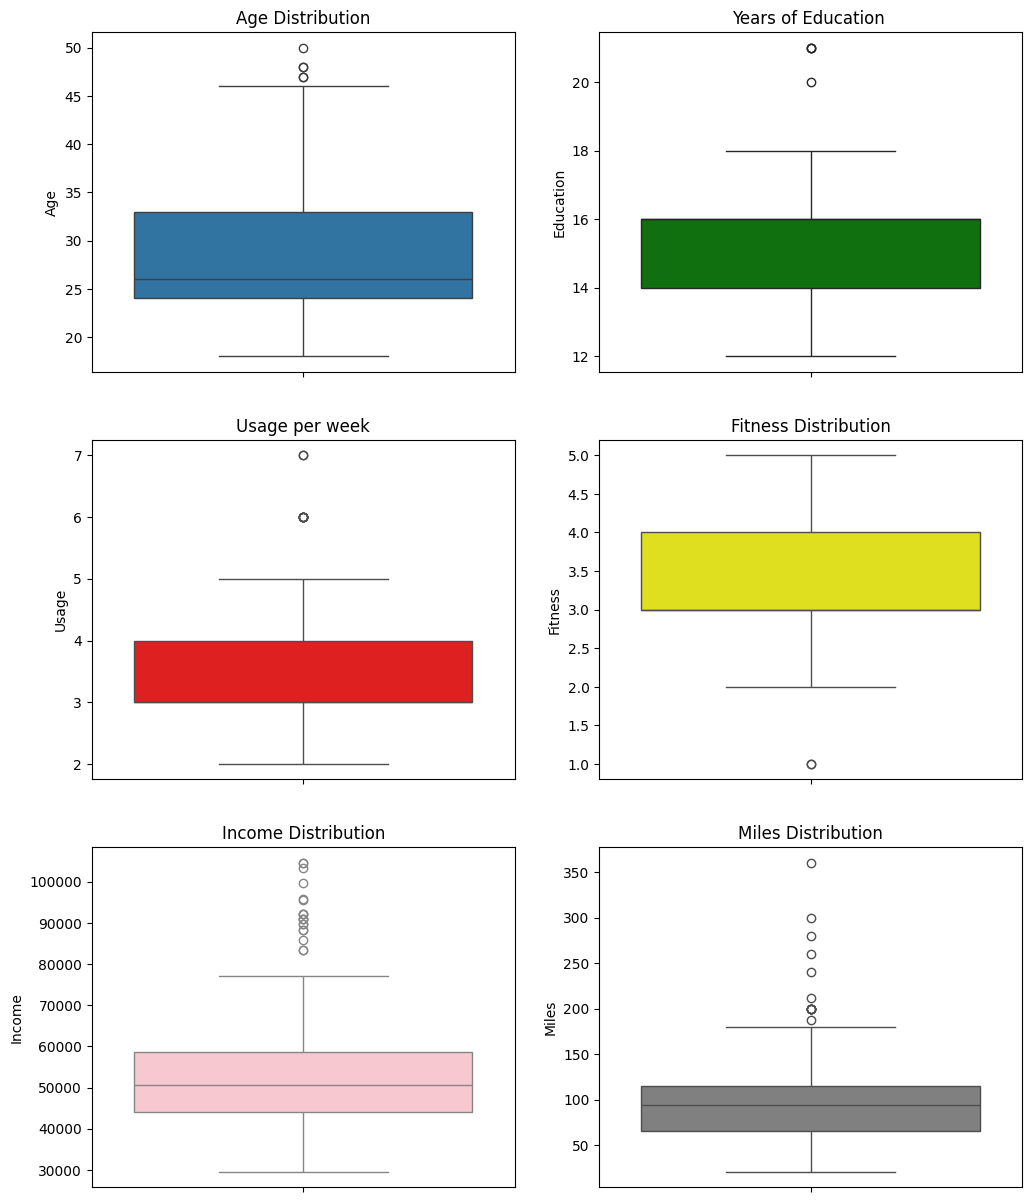

In [74]:
plt.figure(figsize=(12,15))

plt.subplot(3,2,1)
sns.boxplot(df['Age'] )
plt.title('Age Distribution')

plt.subplot(3,2,2)
sns.boxplot(df['Education'], color ='green')
plt.title('Years of Education ')\

plt.subplot(3,2,3)
sns.boxplot( df['Usage'], color='red')
plt.title('Usage per week')

plt.subplot(3,2,4)
sns.boxplot(df['Fitness'],color ='yellow')
plt.title('Fitness Distribution')

plt.subplot(3,2,5)
sns.boxplot(df['Income'],color='pink')
plt.title('Income Distribution')

plt.subplot(3,2,6)
sns.boxplot(df['Miles'], color ='grey')
plt.title('Miles Distribution')

plt.show()

In [75]:
print("\nMean vs Median Analysis:")
for column in ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']:
    stats = df[column].describe().round(2)
    print(f"{column}: Mean = {stats['mean']}, Median = {stats['50%']}, Difference = {(stats['mean'] - stats['50%']).round(2)}")


Mean vs Median Analysis:
Age: Mean = 28.79, Median = 26.0, Difference = 2.79
Education: Mean = 15.57, Median = 16.0, Difference = -0.43
Usage: Mean = 3.46, Median = 3.0, Difference = 0.46
Fitness: Mean = 3.31, Median = 3.0, Difference = 0.31
Income: Mean = 53719.58, Median = 50596.5, Difference = 3123.08
Miles: Mean = 103.19, Median = 94.0, Difference = 9.19


**Insights:**

*   Age: It is observed that the customers have a median age of 26, while any one aged below 18 or above 46 would be considered as an outlier
*   Education: It is observed that those with years of education lesser than 12 or greater than 18, may be considered as outliers.

*   Usage: It is observed that the customers use the treadmill 3-4 times on an average. However, a few customers who use it for 6-7 times a week, are outliers.
*   Fitness: The median fitness ranges between 3-4. While outliers are those who rate themselves below 2.

*   Income: The median income is close to 50000 USD while there are outliers with income greater than 80000 USD.

*   Miles:The median number of miles the customer expects to walk/run each week is between 90 to 100 while there are a potential number of outliers who expect to walk/run for more than 180 miles.








Analyzing if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)

In [76]:
# For marital status
df_marry_count = df.groupby('Product')['MaritalStatus'].value_counts()
df_marry_count

Product  MaritalStatus
KP281    Partnered        48
         Single           32
KP481    Partnered        36
         Single           24
KP781    Partnered        23
         Single           17
Name: count, dtype: int64

<Axes: xlabel='MaritalStatus', ylabel='count'>

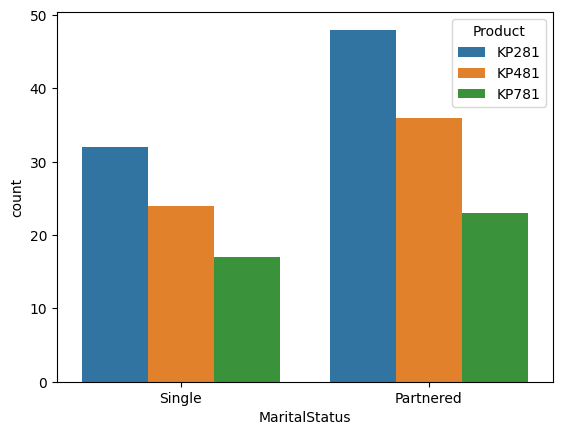

In [77]:
sns.countplot(data =df, x='MaritalStatus',hue ='Product')

**Insight:** It is observed that a majority of Aerofit customers are partnered.The count of products of each category (among KP281,KP481,KP781) used by partnerned customers outpasses that of single customers.

Among the type of products used, KP281 (entry level treadmill) stands out to be the most preferred type, followed by KP481 (mid level) and KP781 (advanced level).

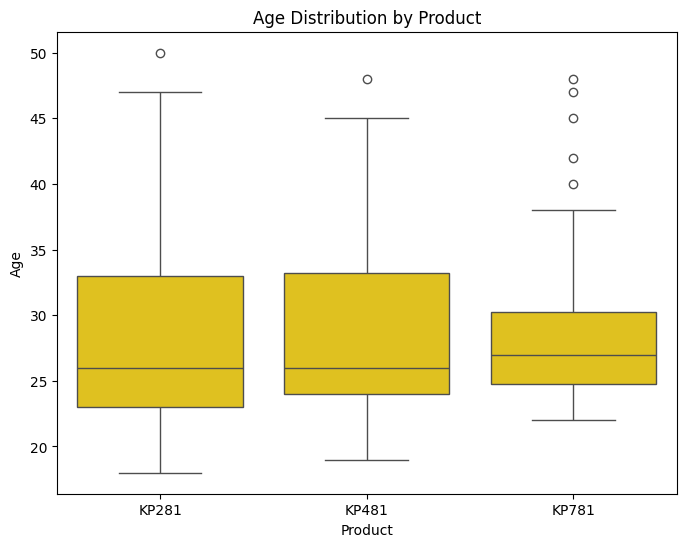

In [78]:
# Checking for age
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Product", y="Age",color='gold')
plt.title("Age Distribution by Product")
plt.show()

In [79]:
# Calculate the minimum,maximum and median age for each product type
median_age_per_product = df.groupby("Product")["Age"].median()
min_age_per_product = df.groupby("Product")["Age"].min()
max_age_per_product = df.groupby("Product")["Age"].max()

df_age =pd.DataFrame({'Lowest_Age': min_age_per_product,'Median_Age': median_age_per_product,'Highest_Age': max_age_per_product})
df_age



,Lowest_Age,Median_Age,Highest_Age
Product,,,
KP281,18,26.0,50
KP481,19,26.0,48
KP781,22,27.0,48


**Insights:**


*   It is observed that among the treadmills, KP281 treadmill is widely

used by customers pertaining to different age groups between 18 to 50.


*   It is observed that the lowest and median age of the customers using KP781 are 22 and 27 respectively, indicating that most of the customers using KP781 are of a higher age when compared to the other two.





4.Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)


In [80]:
# Crosstab to count occurrences of each product
product_crosstab = pd.crosstab(index=df['Product'], columns="Count")

# Calculate marginal probabilities
product_crosstab['Percentage'] = (product_crosstab['Count'] / product_crosstab['Count'].sum()) * 100

# Display the result
product_crosstab


col_0,Count,Percentage
Product,,
KP281,80,44.444444
KP481,60,33.333333
KP781,40,22.222222


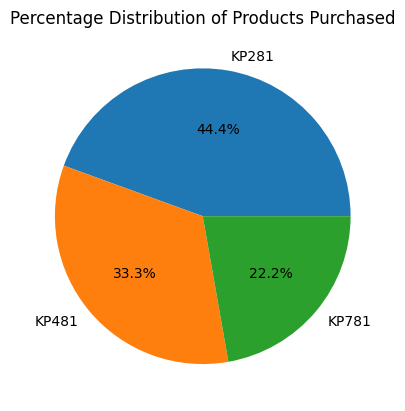

In [81]:
plt.pie(
    product_crosstab['Percentage'],
    labels=product_crosstab.index,
    autopct='%1.1f%%',
)
plt.title('Percentage Distribution of Products Purchased')
plt.show()

**Insight**: It is observed that 44.4% of the customers use KP281, 33.3% use KP481 and 22.2% use KP781.

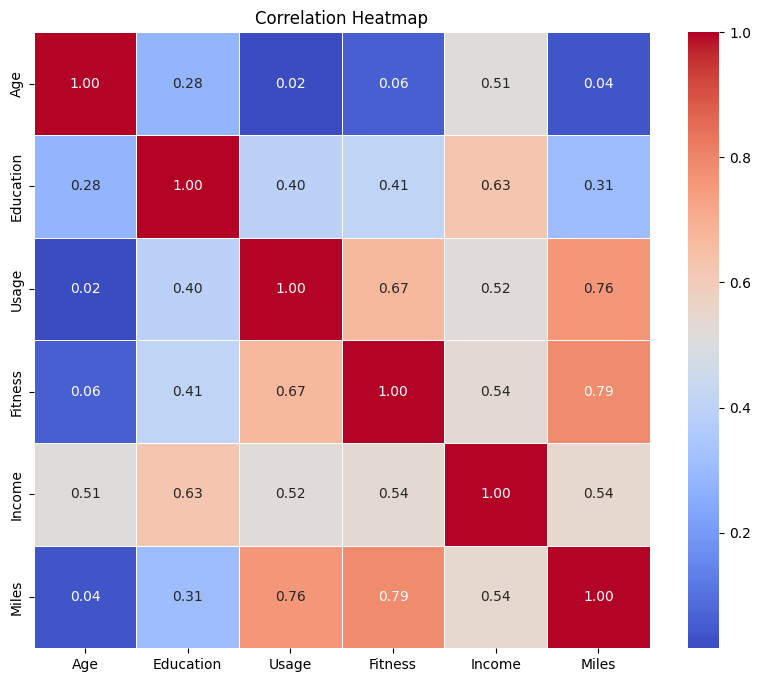

In [82]:
# Select only numerical columns for correlation
numerical_data = df.select_dtypes(include=["number"])

# Compute the correlation matrix for numerical columns
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5
)
plt.title("Correlation Heatmap")
plt.show()


**Insight:** It can be inferred that some columns such as Usage-Miles, Fitness-Miles, Income-Education, Fitness-Usage display a decent correlation. While 'Age' does not tend to be closely correlated.


Contingency Table (Product vs Gender):
Gender     Female      Male
Product                    
KP281    0.500000  0.500000
KP481    0.483333  0.516667
KP781    0.175000  0.825000

Contingency Table (Product vs Marital Status):
MaritalStatus  Partnered  Single
Product                         
KP281              0.600   0.400
KP481              0.600   0.400
KP781              0.575   0.425

Contingency Table (Product vs Fitness):
Fitness         1      2      3         4      5
Product                                         
KP281    0.012500  0.175  0.675  0.112500  0.025
KP481    0.016667  0.200  0.650  0.133333  0.000
KP781    0.000000  0.000  0.100  0.175000  0.725


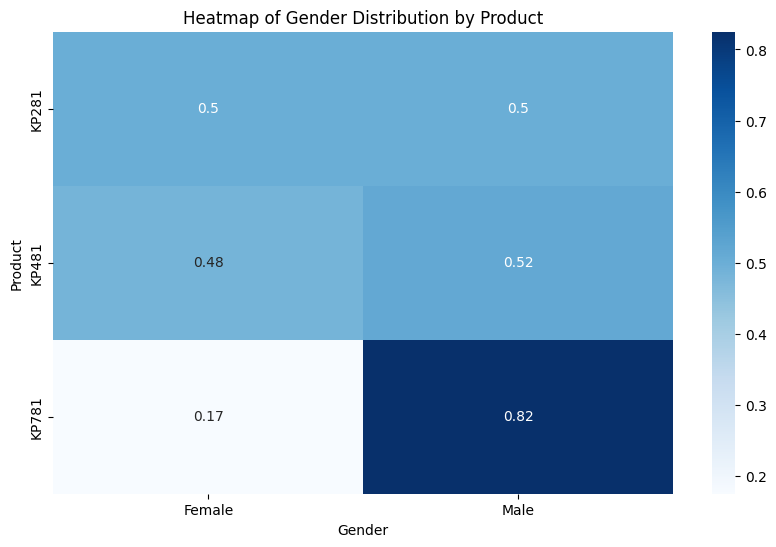

In [83]:
contingency_gender = pd.crosstab(df['Product'], df['Gender'], normalize='index')
print("\nContingency Table (Product vs Gender):")
print(contingency_gender)

contingency_marital = pd.crosstab(df['Product'], df['MaritalStatus'], normalize='index')
print("\nContingency Table (Product vs Marital Status):")
print(contingency_marital)

contingency_fitness = pd.crosstab(df['Product'], df['Fitness'], normalize='index')
print("\nContingency Table (Product vs Fitness):")
print(contingency_fitness)

# Heatmaps for Contingency Tables
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_gender, annot=True, cmap='Blues')
plt.title('Heatmap of Gender Distribution by Product')
plt.show()

**Insights:**


*   It is observed that there is an equal probability for both male and female to buy KP281.
*   Incase of KP481 treadmill, there is a slightly higher probability for males (0.52)


*   It is also observed that men are more likely to buy a KP781 treadmill (probability = 0.82) when compared to women.
*   Additionally, users of KP781 are more likely to rate themselves with a 5 in terms of fitness. This is in consistency with the fact that KP781 is for advanced level, typically used by those who do regular work-out.



*   On the other hand, users of other two kinds of treadmill are more likely to rate themselves with 2-3.
*   It is observed that parterned users dominate the usage in all three treadmills.








### Missing Value & Outlier Detection

In [84]:
print("\nPercentage of Missing Values:")
missing_percentage = (df.isna().sum() / len(df)) * 100
missing_percentage


Percentage of Missing Values:


,0
Product,0.0
Age,0.0
Gender,0.0
Education,0.0
MaritalStatus,0.0
Usage,0.0
Fitness,0.0
Income,0.0
Miles,0.0


Insight: There are no missing values in the dataset.

In [85]:
# Outlier Detection
# Detect Outliers Using IQR
def detect_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

numerical_columns = ['Age', 'Education', 'Income', 'Usage', 'Miles']
for column in numerical_columns:
    outliers = detect_outliers_iqr(column)
    print(f"{column}: {len(outliers)} outliers")



Age: 5 outliers
Education: 4 outliers
Income: 19 outliers
Usage: 9 outliers
Miles: 13 outliers


### Recommendations



### *   Usage and Fitness Based Insights
In case of new customers, it would be appropriate to get an estimate of their fitness rating and perform as follows:



1.   Customers with Low Fitness Levels (1-2):
Recommend KP281 as a starting point to build fitness habits. It is advisable to keep an adequate inventory of KP281 treadmills as most of the existing customer base (44.44%) also uses KP281 and the demand is expected to rise with the advent of new customers.
2.   Customers with High Fitness Levels (4-5):
 KP781 or KP481 treadmill may be recommended, depending on income.

### * Pricing Strategy
1. Since it has been observed that people with low ages are more likely the ones with lower incomes, the pricing of beginner level treadmill may be lowered, to attract more customers.

### *  Marital Status Based Strategies


1.  Single Customers: Highlight personal fitness goals and benefits of owning a treadmill
Offer flexible payment options or discounts to attract young professionals.

2. Partnered Customers: Promote treadmills as a shared household fitness solution.

### * Product Innovation


1.   Come up with initiatives to encourage customers, such as setting fitness challenges. This shall help customers in reaching their fitness targets and stay engaged.
2. Analyze their fitness status periodically and recommend if they can switch to intermediate/advanced level treadmills.




### * Customer Engagement and Retention
1. Reward loyal customers with accessories or upgrades.
2. Develop an app to track treadmill usage and fitness progress, keeping customers engaged.

### * Recommendations for Data-Driven Growth
1. Regularly collect and analyze customer feedback to refine product features and services.
2. Expand data collection to include geographic information and customer preferences for better segmentation.

